In [ ]:
import os
import sys
import numpy as np
import time
#import pygmt
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as md
import obspy
from obspy import read_inventory
sys.path.append('../../../tremorExplorer2/lib')
import Spectrograms
sys.path.append('../lib')
import setup_paths
paths = setup_paths.paths
import SAM
def plot_rsam_fratio(rsamObj, new_sampling_interval=None):

    for tr_id in rsamObj.dataframes:
        DF = rsamObj.dataframes[tr_id]
        fh, axh1=plt.subplots(1,1)
        fh.set_size_inches(10, 2)
        axh1.plot(DF['median'], 'C0', alpha=0.3)
        DF['mean60'] = DF['mean'].rolling(60).mean()
        axh1.plot(DF['mean60'], 'C0')
        if new_sampling_interval:
            rsamObj = rsamObj.downsample(new_sampling_interval=3600)
            if new_sampling_interval==600:
                axh1.set_ylabel('RSAM\nmedian of 10-min window', color='C0')
            elif new_sampling_interval==3600:
                axh1.set_ylabel('RSAM\nmedian of each 1-hr window', color='C0')
        else:
            axh1.set_ylabel('RSAM\nmedian of each 1-min window', color='C0')
        axh1.tick_params(axis='y', color='C0', labelcolor='C0')
        axh2 = axh1.twinx()
        DF['fratio60'] = pd.Series(np.log2(DF['VT']/DF['LP'])).rolling(60).mean()
        axh2.plot(DF['fratio'], 'C1', alpha=0.3)
        axh2.plot(DF['fratio60'], 'C1')
        axh2.grid()
        axh2.set_ylabel('Frequency Ratio\nlog2(VT band/LP band)', color='C1')
        axh2.tick_params(axis='y', color='C1', labelcolor='C1')
        axh2.spines['right'].set_color('C1')
        axh2.spines['left'].set_color('C0')
        #axh1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0]))
        #axh1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        #plt.setp(axh1.xaxis.get_majorticklabels(), rotation = 90)
        #for tick in axh1.get_xticklabels():
        #    tick.set_rotation(90)
        plt.show()


#rsamObjList = []
secondsPerDay = 60 * 60 * 24
from obspy import UTCDateTime
eruption_times = [
    UTCDateTime(2012,8,4,16,52,0),
    UTCDateTime(2013,2,22,18,20,0),
    UTCDateTime(2013,4,5,23,59,0),
    UTCDateTime(2013,8,19,22,23,0),
    UTCDateTime(2013,10,11,7,9,0),
    UTCDateTime(2016,4,27,9,37,0),
    UTCDateTime(2019,12,9,1,11,0),
    ]
for ertime in eruption_times:
    YMD = ertime.strftime('%Y%m%d')
    fname = os.path.join(os.getenv('HOME'), 'data', f"{YMD}_velocity_seismogram.pkl")
    print(fname)
    try:
        st = obspy.read(fname)
    except Exception as e:
        print(e)
        continue
    print(st)

    '''
    try:
        st.trim(starttime=ertime-3600,endtime=st[0].stats.endtime)
    except Exception as e:
        print(e)
        print('Cannot trim. skipping')
        continue
        '''
        
    #st.plot()
    for tr in st:
        tr.stats['units'] = 'm/s'
    vsamObj = SAM.VSAM(stream=st)
    spobj = Spectrograms.icewebSpectrogram(stream=st)
    spobj.precompute()
    #spobj.compute_amplitude_spectrum()
    spobj.compute_band_ratio()
    #for tr in spobj.stream:
    #    ampengfft()
    spobj.plot()
    
    #vsamObj.plot(metrics=['median', 'fratio'])
    plot_rsam_fratio(vsamObj)

    fname = os.path.join(os.getenv('HOME'), 'data', f"{YMD}_displacement_seismogram.pkl")
    st = obspy.read(fname)
    #st.plot()
    for tr in st:
        tr.stats['units'] = 'm'
    dsamObj = SAM.DSAM(stream=st)
    #dsamObj.plot(metrics=['median', 'fratio'])
    plot_rsam_fratio(dsamObj)


/var/folders/4q/5426zn1d72vgcb6h658n_8800000gn/T/ipykernel_59203/69241899.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/Users/thompsong/data/20120804_velocity_seismogram.pkl
1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2012-08-01T16:51:59.998394Z - 2012-08-04T17:51:59.998394Z | 100.0 Hz, 26280001 samples
VSAM


/Users/thompsong/data/20120804_velocity_seismogram.pkl
1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2012-08-04T16:51:59.998394Z - 2012-08-04T17:01:59.998394Z | 100.0 Hz, 60001 samples
(1145,)
(2049,)
(2049, 1145)
{'stream': <obspy.core.stream.Stream object at 0x1fcf5ea40>, 'precomputed': True}


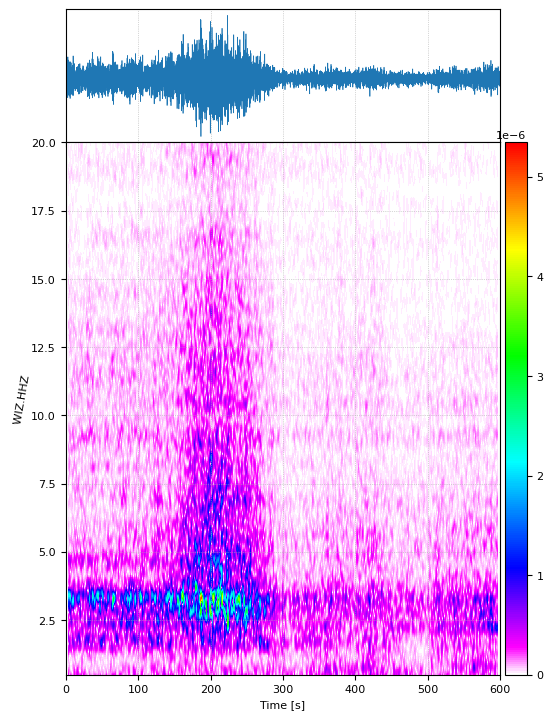

In [49]:
import os
import sys
import numpy as np
import time 
#import pygmt
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as md
import obspy
from obspy import read_inventory

sys.path.append('../lib')
import Spectrograms
import setup_paths
paths = setup_paths.paths
import SAM
def plot_rsam_fratio(rsamObj, new_sampling_interval=None):

    for tr_id in rsamObj.dataframes:
        DF = rsamObj.dataframes[tr_id]
        fh, axh1=plt.subplots(1,1)
        fh.set_size_inches(10, 2)
        axh1.plot(DF['median'], 'C0', alpha=0.3)
        DF['mean60'] = DF['mean'].rolling(60).mean()
        axh1.plot(DF['mean60'], 'C0')
        if new_sampling_interval:
            rsamObj = rsamObj.downsample(new_sampling_interval=3600)
            if new_sampling_interval==600:
                axh1.set_ylabel('RSAM\nmedian of 10-min window', color='C0')
            elif new_sampling_interval==3600:
                axh1.set_ylabel('RSAM\nmedian of each 1-hr window', color='C0')
        else:
            axh1.set_ylabel('RSAM\nmedian of each 1-min window', color='C0')
        axh1.tick_params(axis='y', color='C0', labelcolor='C0')
        axh2 = axh1.twinx()
        DF['fratio60'] = pd.Series(np.log2(DF['VT']/DF['LP'])).rolling(60).mean()
        axh2.plot(DF['fratio'], 'C1', alpha=0.3)
        axh2.plot(DF['fratio60'], 'C1')
        axh2.grid()
        axh2.set_ylabel('Frequency Ratio\nlog2(VT band/LP band)', color='C1')
        axh2.tick_params(axis='y', color='C1', labelcolor='C1')
        axh2.spines['right'].set_color('C1')
        axh2.spines['left'].set_color('C0')
        #axh1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0]))
        #axh1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        #plt.setp(axh1.xaxis.get_majorticklabels(), rotation = 90)
        #for tick in axh1.get_xticklabels():
        #    tick.set_rotation(90)
        plt.show()


#rsamObjList = []
secondsPerDay = 60 * 60 * 24
from obspy import UTCDateTime
eruption_times = [
    UTCDateTime(2012,8,4,16,52,0),
    ]
for ertime in eruption_times:
    YMD = ertime.strftime('%Y%m%d')
    fname = os.path.join(os.getenv('HOME'), 'data', f"{YMD}_velocity_seismogram.pkl")
    print(fname)
    try:
        st = obspy.read(fname)
    except Exception as e:
        print(e)
        continue
    #print(st)
    st.trim(starttime=ertime, endtime=ertime+600)
    print(st)
    spobj = Spectrograms.icewebSpectrogram(stream=st)
    spobj.precompute()
    spobj.plot()



In [ ]:
import importlib
importlib.reload(Spectrograms)
dailyspobj = Spectrograms.dailySpectrogram()
dailyspobj.load(infiles='FTS_NZ.WIZ.10.HHZ.20120801')#, nrows=20000)
iwsobj = dailyspobj.to_icewebSpectrogram()
iwsobj.plot()


In [1]:
import os
import sys
import numpy as np
import time 
#import pygmt
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as md
import obspy
from obspy import read_inventory

sys.path.append('../lib')
import Spectrograms
import setup_paths
paths = setup_paths.paths
import SAM
def plot_rsam_fratio(rsamObj, new_sampling_interval=None):

    for tr_id in rsamObj.dataframes:
        DF = rsamObj.dataframes[tr_id]
        fh, axh1=plt.subplots(1,1)
        fh.set_size_inches(10, 2)
        axh1.plot(DF['median'], 'C0', alpha=0.3)
        DF['mean60'] = DF['mean'].rolling(60).mean()
        axh1.plot(DF['mean60'], 'C0')
        if new_sampling_interval:
            rsamObj = rsamObj.downsample(new_sampling_interval=3600)
            if new_sampling_interval==600:
                axh1.set_ylabel('RSAM\nmedian of 10-min window', color='C0')
            elif new_sampling_interval==3600:
                axh1.set_ylabel('RSAM\nmedian of each 1-hr window', color='C0')
        else:
            axh1.set_ylabel('RSAM\nmedian of each 1-min window', color='C0')
        axh1.tick_params(axis='y', color='C0', labelcolor='C0')
        axh2 = axh1.twinx()
        DF['fratio60'] = pd.Series(np.log2(DF['VT']/DF['LP'])).rolling(60).mean()
        axh2.plot(DF['fratio'], 'C1', alpha=0.3)
        axh2.plot(DF['fratio60'], 'C1')
        axh2.grid()
        axh2.set_ylabel('Frequency Ratio\nlog2(VT band/LP band)', color='C1')
        axh2.tick_params(axis='y', color='C1', labelcolor='C1')
        axh2.spines['right'].set_color('C1')
        axh2.spines['left'].set_color('C0')
        #axh1.xaxis.set_major_locator(md.MinuteLocator(byminute = [0]))
        #axh1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
        #plt.setp(axh1.xaxis.get_majorticklabels(), rotation = 90)
        #for tick in axh1.get_xticklabels():
        #    tick.set_rotation(90)
        plt.show()


#rsamObjList = []
secondsPerDay = 60 * 60 * 24
from obspy import UTCDateTime
eruption_times = [
    UTCDateTime(2012,8,4,16,52,0),
    UTCDateTime(2013,2,22,18,20,0),
    UTCDateTime(2013,4,5,23,59,0),
    UTCDateTime(2013,8,19,22,23,0),
    UTCDateTime(2013,10,11,7,9,0),
    UTCDateTime(2016,4,27,9,37,0),
    UTCDateTime(2019,12,9,1,11,0),
    ]
for ertime in eruption_times:
    YMD = ertime.strftime('%Y%m%d')
    fname = os.path.join(os.getenv('HOME'), 'data', f"{YMD}_velocity_seismogram.pkl")
    print(fname)
    try:
        st = obspy.read(fname)
    except Exception as e:
        print(e)
        continue
    print(st)

    '''
    try:
        st.trim(starttime=ertime-3600,endtime=st[0].stats.endtime)
    except Exception as e:
        print(e)
        print('Cannot trim. skipping')
        continue
        '''

    '''
    #st.plot()
    for tr in st:
        tr.stats['units'] = 'm/s'
    vsamObj = SAM.VSAM(stream=st)
    '''
    #spobj = Spectrograms.icewebSpectrogram(stream=st)
    
    for tr in st:
        spfileobj = Spectrograms.spectrogramFile()
        spfileobj.compute(tr)
        spfileobj.compute_metrics()
        
    '''
    #vsamObj.plot(metrics=['median', 'fratio'])
    plot_rsam_fratio(vsamObj)

    fname = os.path.join(os.getenv('HOME'), 'data', f"{YMD}_displacement_seismogram.pkl")
    st = obspy.read(fname)
    #st.plot()
    for tr in st:
        tr.stats['units'] = 'm'
    dsamObj = SAM.DSAM(stream=st)
    #dsamObj.plot(metrics=['median', 'fratio'])
    plot_rsam_fratio(dsamObj)
    '''


/Users/thompsong/data/20120804_velocity_seismogram.pkl
1 Trace(s) in Stream:
NZ.WIZ.10.HHZ | 2012-08-01T16:51:59.998394Z - 2012-08-04T17:51:59.998394Z | 100.0 Hz, 26280001 samples
NZ.WIZ.10.HHZ | 2012-08-01T16:51:59.998394Z - 2012-08-01T17:01:59.998394Z | 100.0 Hz, 60001 samples
- Computing spectrograms
secsPerFFT=2.56
NZ.WIZ.10.HHZ | 2012-08-01T17:01:59.998394Z - 2012-08-01T17:11:59.998394Z | 100.0 Hz, 60001 samples
- Computing spectrograms
secsPerFFT=2.56
NZ.WIZ.10.HHZ | 2012-08-01T17:11:59.998394Z - 2012-08-01T17:21:59.998394Z | 100.0 Hz, 60001 samples
- Computing spectrograms
secsPerFFT=2.56
NZ.WIZ.10.HHZ | 2012-08-01T17:21:59.998394Z - 2012-08-01T17:31:59.998394Z | 100.0 Hz, 60001 samples
- Computing spectrograms
secsPerFFT=2.56
NZ.WIZ.10.HHZ | 2012-08-01T17:31:59.998394Z - 2012-08-01T17:41:59.998394Z | 100.0 Hz, 60001 samples
- Computing spectrograms
secsPerFFT=2.56
NZ.WIZ.10.HHZ | 2012-08-01T17:41:59.998394Z - 2012-08-01T17:51:59.998394Z | 100.0 Hz, 60001 samples
- Computing spe

TypeError: unsupported operand type(s) for *: 'UTCDateTime' and 'float'